# Pandas Basics

How to begin exploring a dataset with Pandas (and maybe some other standard Python data tools).

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import arrow
import datetime


%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

There are a lot of libraries above but the only one to focus on for now is the `import pandas as pd`. It is convention to abbreviate calls to Pandas as pd.

The Pandas library comes down to two object types:

* Series
* DataFrame

For our purposes a DataFrame is your basic rows/column data table and a Series is just a 1-D DataFrame (a single column). Understanding how to get slices of data from your DataFrame and all the cool functions a DataFrame has is the key to feeling comfortable with Pandas.

Now let's get started!

This tutorial we'll be looking at Yelp user data. There quite a few columns in this data and Pandas will want to truncate any output it shows us so first we'll change a couple global Pandas options.

In [13]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

We're ready to make our first Pandas DataFrame!

**Importing a csv file**

In [2]:
df = pd.read_csv("E:\\Data Science Playgrounds\\Yelp dataset\\yelp_user.csv")

In [22]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


There it is! Our Yelp dataset is now a Pandas DataFrame.

**Looking at the first few rows of a dataset**

In [14]:
df.head(n=5)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


**Getting the number of (rows, columns) in a dataset**

In [3]:
df.shape

(1326100, 22)

**Quickly get descriptive statistics from columns**

In [5]:
df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06
mean,2.311717e+01,2.934477e+01,1.461139e+01,1.960347e+01,1.457274e+00,3.710841e+00,2.534310e+00,3.819033e-01,2.478478e-01,2.301101e-01,1.009637e-01,1.684783e+00,3.523903e+00,3.508096e+00,3.508096e+00,1.334797e+00,1.187572e+00
std,7.909808e+01,7.058728e+02,4.974612e+02,6.695229e+02,1.428609e+01,1.120721e+00,7.653176e+01,1.489118e+01,1.769975e+01,1.403812e+01,1.205389e+01,6.033666e+01,9.379238e+01,8.955264e+01,8.955264e+01,3.417995e+01,9.954291e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.090000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.610000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.195400e+04,2.247100e+05,2.127610e+05,2.224160e+05,7.009000e+03,5.000000e+00,2.429300e+04,1.347800e+04,1.413700e+04,1.363800e+04,1.264700e+04,5.696000e+04,4.183500e+04,2.976500e+04,2.976500e+04,1.540300e+04,8.258000e+04


Notice how the `describe()` function knows to only get statistics from columns that make some kind of sense (numeric).

**Is there missing data?**

In [21]:
df.isnull().sum()

user_id                 0
name                  497
review_count            0
yelping_since           0
friends                 0
useful                  0
funny                   0
cool                    0
fans                    0
elite                   0
average_stars           0
compliment_hot          0
compliment_more         0
compliment_profile      0
compliment_cute         0
compliment_list         0
compliment_note         0
compliment_plain        0
compliment_cool         0
compliment_funny        0
compliment_writer       0
compliment_photos       0
dtype: int64

Another way to do this that just gives a total count:

In [19]:
if df[df.isnull().any(axis=1)].empty:
    print("No missing values!")
else:
    print("Missing data from {} rows".format(df[df.isnull().any(axis=1)].shape[0]))

Missing data from 497 rows


**Plot the histogram for a column**

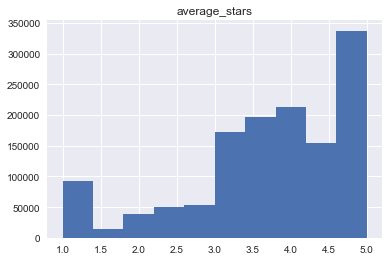

In [17]:
df.hist(column="average_stars");

I wouldn't recommend using Pandas for plotting. It effectively calls Matplotlib in the background to build these graphs but it can be difficult to get a nice looking plot this way. It's fine for making quick analysis that only you will see, but if anyone else had to see this I would either use Matplotlib directly, or some other popular visualization library (i.e. Seaborn, Plotly, Bokeh, ggplot).